# Predict assessed property value  for the purpose of property tax assessment

#### Here, we have data of properties collected by a Municipal Council for the purpose of computation of assessed value and assessment of property tax within the framework of state laws. An individual tax lot may range from multiple buildings to just one residential or commercial unit in a condominium.Assessed value depends on the variables such as  location, building class for understanding constructive use, area (land and/or buildup), year of construction etc.  Location can be measured by certaindata elements like ZIP code, longitudinal, latitudinal measures etc. 

#### The Municipal council is facing the problem of many citizens challenging the assessment of property taxes and is criticized for complicated assessment procedure system as well as multiple required filings throughout the year to challenge one’s assessment. Therefore, the Council wants to rationalise the tax assessment system.They also want to structure benefit programs based on certain variables of statistical significance to incentivise additional construction activity or activity of conversion/modification of properties for reducing tax burden and/or to make the contemplated projects more economically feasible.Therefore  the  idea  is to  achieve  consistent,  rational  and  objective  assessment of properties based  on  a  predictive  model  by automating  the  property  valuation  process  to  reduce  the unfairness within the tax system.

In [196]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from sklearn.linear_model import *
%matplotlib inline

### Reading train data

In [368]:
df_input = pd.read_excel('Train-1665386529049.xlsx')
df_input.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


## Here the target variable is PropertyEvaluationvalue

In [198]:
#Columns in the table
df_input.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation',
       'PropertyEvaluationvalue'],
      dtype='object')

In [199]:
#Last 5 rows
df_input.tail()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,2014-11-30,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,2014-12-19,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,2014-11-16,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,2014-09-17,550000
16809,PR27910,4,NY,HARLEM-UPPER,415 WEST 150 STREET,10031,2065,22,08 RENTALS - ELEVATOR APARTMENTS,16,1,17,4996,29529,2007,2,D7,2013-03-22,5000000


In [200]:
#Shape of the Dataset
df_input.shape

(16810, 19)

In [201]:
#Checking for null values
df_input.isnull().sum()

PropertyID                    0
Borough                       0
State                         0
Surroundings                  0
Address                       0
ZipCode                       0
Block                         0
Lot                           0
BldgClassCategory             0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
TotalNoOfUnits                0
LandAreaInSqFt                0
GrossAreaInSqFt               0
YearOfConstruction            0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
DateOfEvaluation              0
PropertyEvaluationvalue       0
dtype: int64

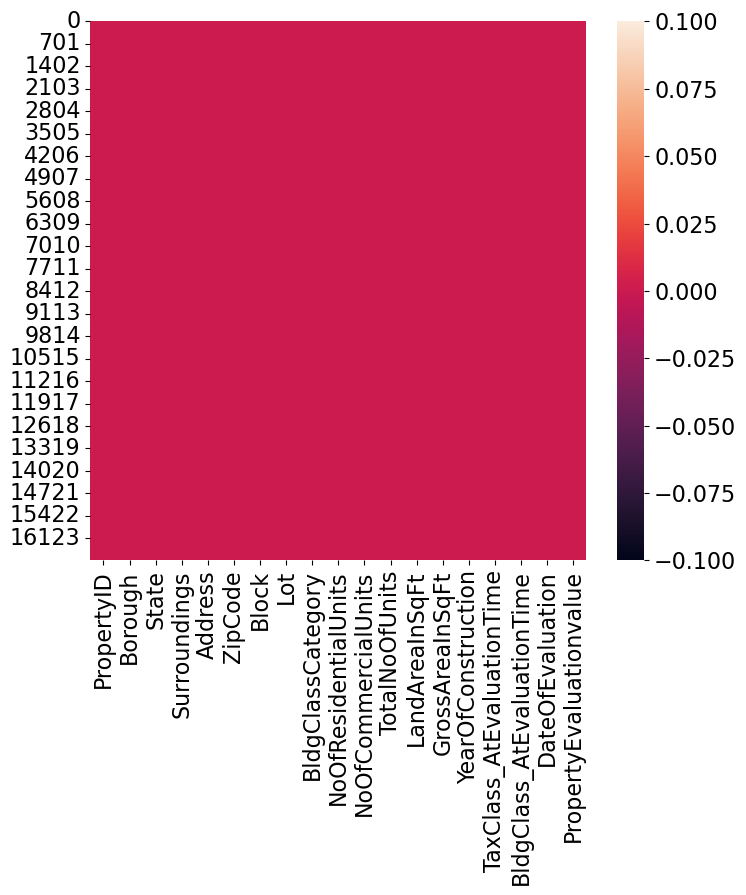

In [378]:
## Null values check and can say that no null values in data

sns.heatmap(df_input.isnull())
plt.show()

##### This shows that there are no null values in our data set

In [203]:
df_input.describe().T

,count,mean,std,min,25%,50%,75%,max
Borough,16810.0,3.439143,1.398950,1.0,2.00,3.0,5.00,5.0
ZipCode,16810.0,10871.027543,522.996869,10001.0,10312.00,11207.0,11364.00,11694.0
Block,16810.0,5428.122308,3710.031921,6.0,2401.25,5050.0,7376.75,16314.0
Lot,16810.0,266.327722,542.420132,1.0,25.00,52.0,138.00,5323.0
NoOfResidentialUnits,16810.0,1.862225,8.027805,0.0,1.00,1.0,2.00,437.0
NoOfCommercialUnits,16810.0,0.137775,2.185857,0.0,0.00,0.0,0.00,252.0
TotalNoOfUnits,16810.0,2.000000,8.472771,1.0,1.00,1.0,2.00,437.0
LandAreaInSqFt,16810.0,10924.918441,58376.198100,1.0,2100.00,3200.0,5000.00,5612000.0
GrossAreaInSqFt,16810.0,3612.156871,16273.783452,1.0,1224.00,1750.0,2449.75,1172005.0
YearOfConstruction,16810.0,1973.982867,23.632595,1941.0,1951.00,1968.0,1998.00,2012.0


In [204]:
df_input.describe(include=['O']).T

,count,unique,top,freq
PropertyID,16810,16810,PR11101,1
State,16810,1,NY,16810
Surroundings,16810,243,FLUSHING-NORTH,801
Address,16810,15219,102 WEST 57TH STREET,102
BldgClassCategory,16810,52,01 ONE FAMILY DWELLINGS,4272
BldgClass_AtEvaluationTime,16810,101,A5,3454


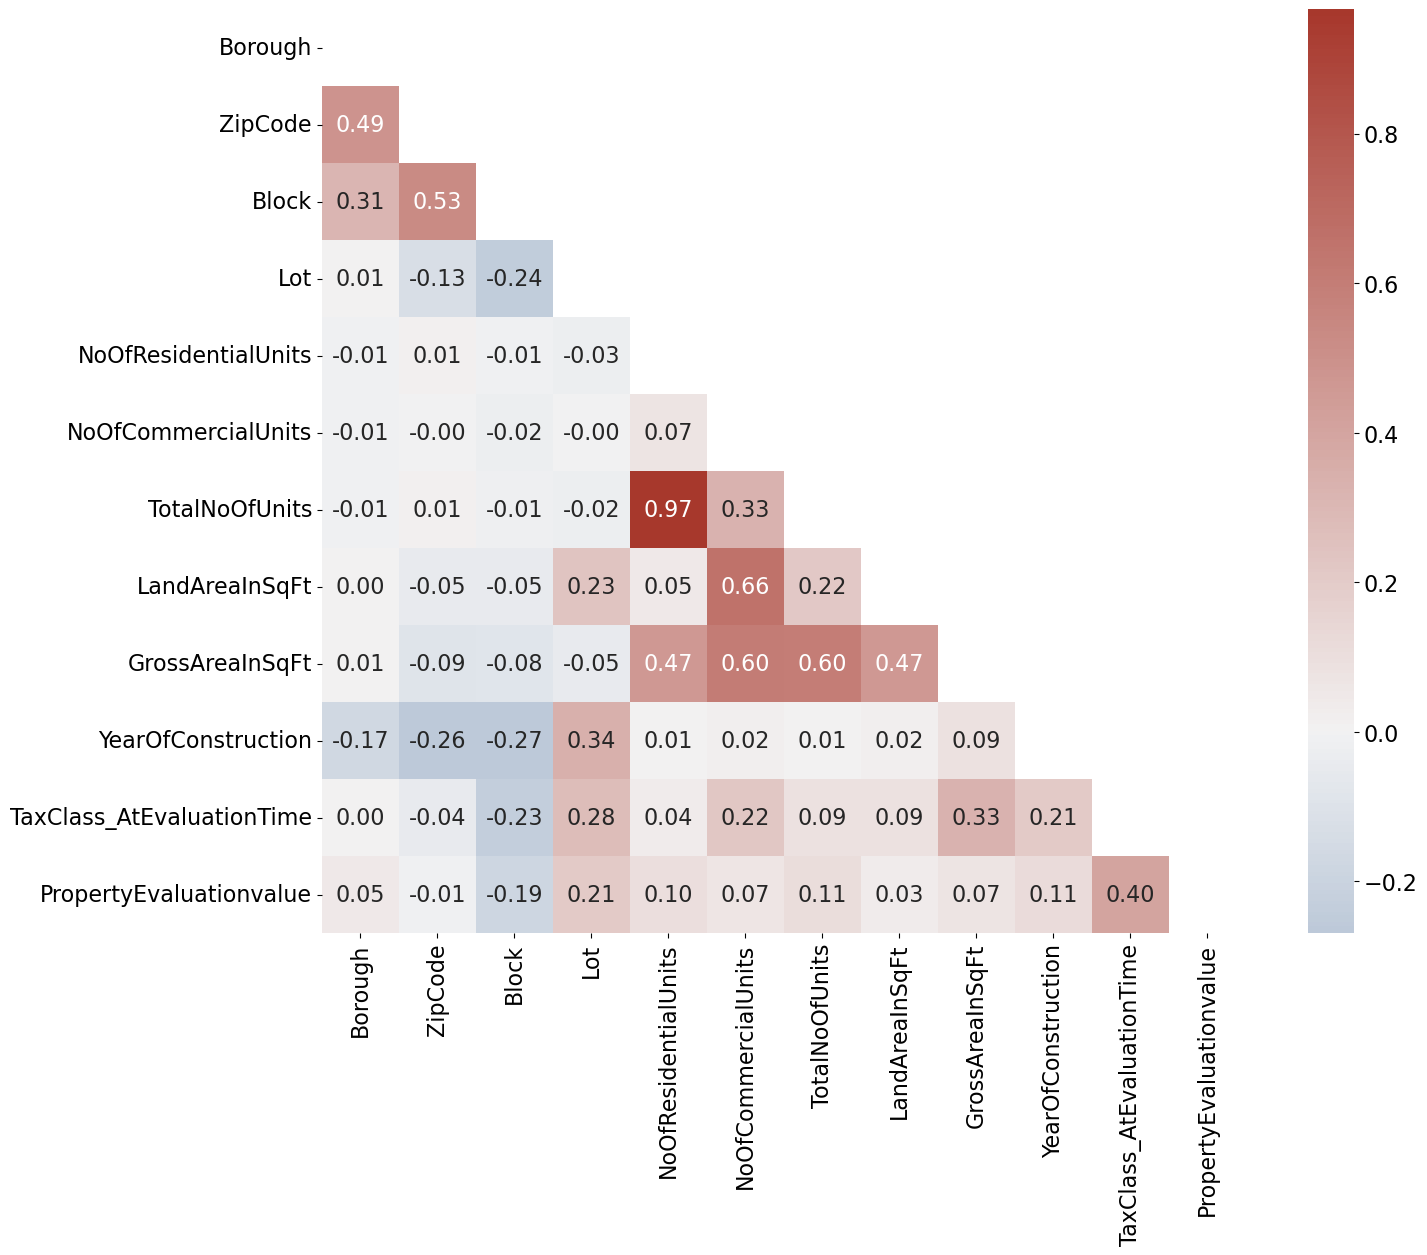

In [205]:
## Corelation Plot

matrix = df_input.corr()
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, center=0, annot=True,fmt='.2f', square=True, cmap=cmap)
plt.show()

In [206]:
#There is high correlation between Total Number of Units and Number of Residential Units. As Total Number of Units is derived from Number of Residential units
# number of commercial units, we can drop Total Number of Units column

#Here PropertyID is unique identifier. Hence can be dropped
# We are going to drop address, as we are going to use Lot, Block, ZipCode, Borough for identifying the building
# We are dropping State as it is NY in all cases
# We need to derive BldgClassCategory from data online
# We need to extract year from DateOfEvaluation

In [207]:
# Dropping unneccessary variables Identifier
drop_cols = ['PropertyID', 'State', 'Address', 'TotalNoOfUnits']
df_final_features = df_input.drop(drop_cols,axis= 1)
df_final_features.head()

,Borough,Surroundings,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,1,BATHGATE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,1900,2394,1990,1,B1,2014-05-30,540000
1,1,BATHGATE,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,1687,3037,2002,1,C0,2014-09-13,750000
2,1,BATHGATE,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2000,2400,1989,1,B1,2014-09-28,470000
3,1,BATHGATE,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2356,2394,1991,1,B1,2014-06-05,570000
4,1,BATHGATE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,3346,2308,1993,1,B1,2015-02-07,640000


In [208]:
#Convert date of evaluation to year of evaluation
df_final_features['YearOfEvaluation'] = df_final_features.DateOfEvaluation.dt.year
df_final_features.head()

,Borough,Surroundings,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue,YearOfEvaluation
0,1,BATHGATE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,1900,2394,1990,1,B1,2014-05-30,540000,2014
1,1,BATHGATE,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,1687,3037,2002,1,C0,2014-09-13,750000,2014
2,1,BATHGATE,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2000,2400,1989,1,B1,2014-09-28,470000,2014
3,1,BATHGATE,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2356,2394,1991,1,B1,2014-06-05,570000,2014
4,1,BATHGATE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,3346,2308,1993,1,B1,2015-02-07,640000,2015


In [209]:
#Dropping date of evaluation column
df_final_features.drop(columns=['DateOfEvaluation'], axis=1, inplace=True)
df_final_features.columns

Index(['Borough', 'Surroundings', 'ZipCode', 'Block', 'Lot',
       'BldgClassCategory', 'NoOfResidentialUnits', 'NoOfCommercialUnits',
       'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction',
       'TaxClass_AtEvaluationTime', 'BldgClass_AtEvaluationTime',
       'PropertyEvaluationvalue', 'YearOfEvaluation'],
      dtype='object')

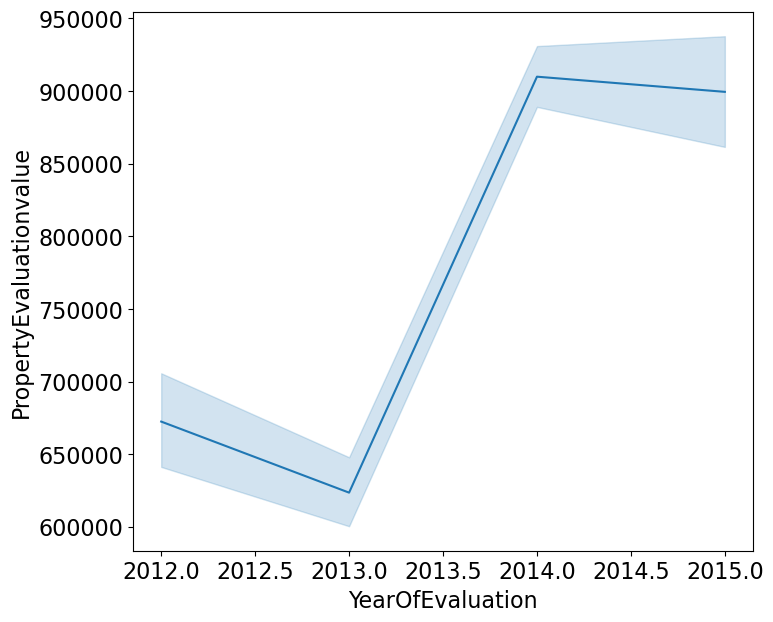

In [371]:
## This gives year wise property evaluation value
## Note: There are inconsistencies found in this data 
      ## 2012 valuation is more than 2013 similarly 2014 valuation more than 2015
      ## There is also massive increase in valuation in 2014 from 2013 which is not seen in any past or future years

sns.lineplot(data=df_final_features, x="YearOfEvaluation", y="PropertyEvaluationvalue")
plt.show()

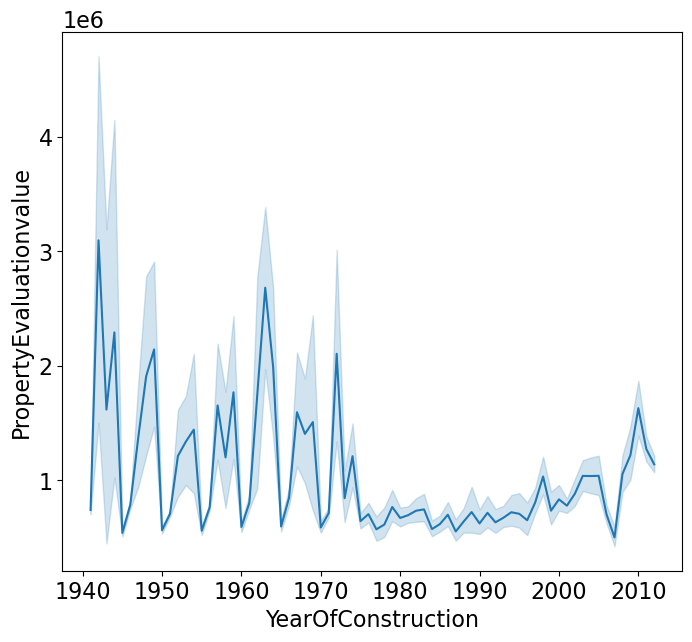

In [373]:
sns.lineplot(data=df_final_features, x="YearOfConstruction", y="PropertyEvaluationvalue")
plt.show()

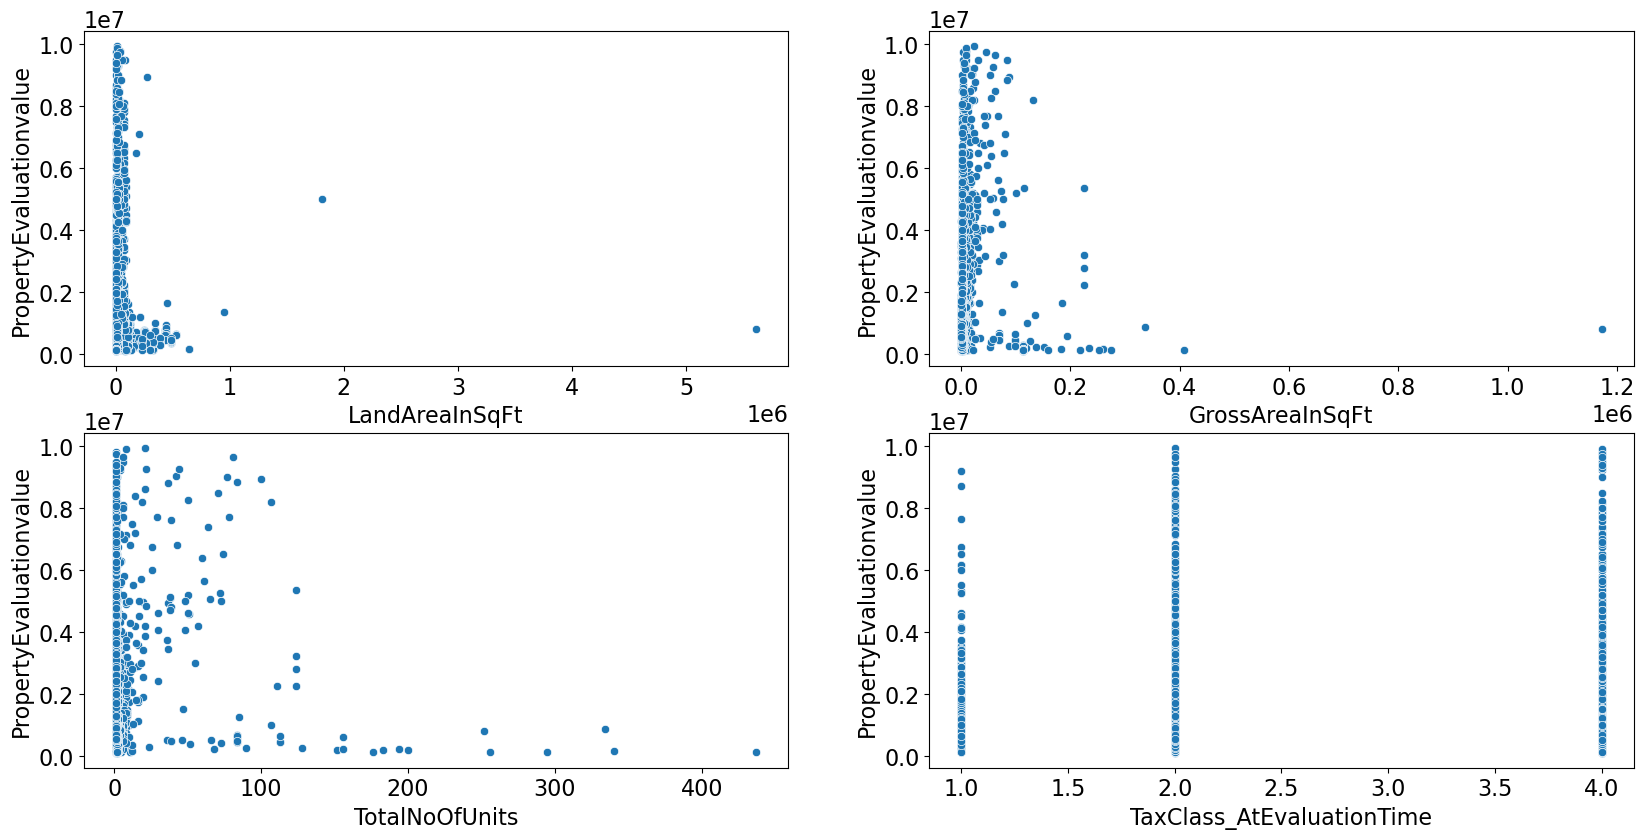

In [375]:
## When there is 0 Sqft in Land Area,Gross Area,Total No of Units there is increase in property evaluation value which shouldn't be
## Few properties in Tax Class 1 also has equal valuation with other Tax class

fig=plt.figure(figsize=(20,20))

feats = ['LandAreaInSqFt','GrossAreaInSqFt','TotalNoOfUnits','TaxClass_AtEvaluationTime']
i = 0
for feat in feats:
    ax=fig.add_subplot(4,2,i+1)
    sns.scatterplot(data=df_input,x=feat,y='PropertyEvaluationvalue',ax=ax)
    i += 1

plt.show()

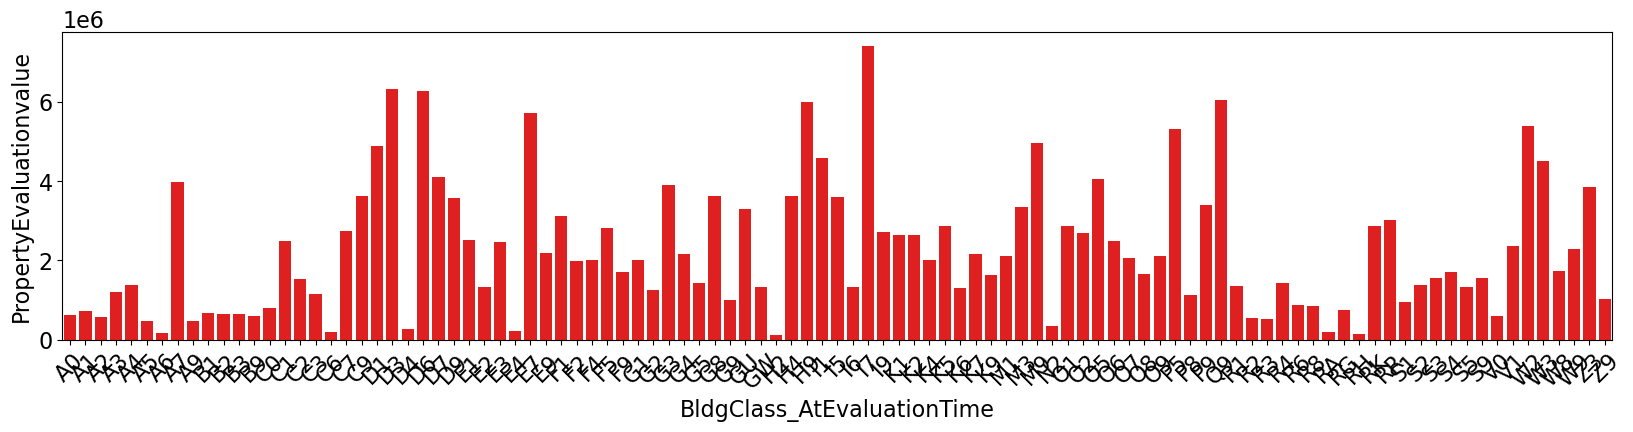

In [377]:
## I7 Bldg Class has highest property evalutation mean and RH has low mean
ce_pv = df_input.groupby(['BldgClass_AtEvaluationTime'])['PropertyEvaluationvalue'].mean()
ce_pv = ce_pv.reset_index()

plt.figure(figsize= (20,4))
sns.barplot(x='BldgClass_AtEvaluationTime', y='PropertyEvaluationvalue', data=ce_pv,color="red")
plt.xticks(rotation= 45)
plt.show()

In [210]:
bldg_class = lambda categoryName: categoryName.split()[0]

In [211]:
# A preventive measure on BldgClassCategory (i.e the current buiding class) The categories are not as per our defined values.
#Hence taking useful among them
df_final_features['BldgClassCategory'] = df_final_features['BldgClassCategory'].apply(bldg_class)
df_final_features['BldgClassCategory']

0        02
1        03
2        02
3        02
4        02
         ..
16805    13
16806    13
16807    13
16808    13
16809    08
Name: BldgClassCategory, Length: 16810, dtype: object

In [212]:
df_final_features.dtypes

Borough                        int64
Surroundings                  object
ZipCode                        int64
Block                          int64
Lot                            int64
BldgClassCategory             object
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
PropertyEvaluationvalue        int64
YearOfEvaluation               int64
dtype: object

In [213]:
df_final_features.describe(include=['O']).T

,count,unique,top,freq
Surroundings,16810,243,FLUSHING-NORTH,801
BldgClassCategory,16810,34,01,7372
BldgClass_AtEvaluationTime,16810,101,A5,3454


In [214]:
#Dropping Building class as the evaluation is done on BldgClass_AtEvaluationTime and not the original one
df_final_features.drop(columns=['BldgClassCategory'], axis=1, inplace=True)
df_final_features.head()

,Borough,Surroundings,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,PropertyEvaluationvalue,YearOfEvaluation
0,1,BATHGATE,10456,2927,127,2,0,1900,2394,1990,1,B1,540000,2014
1,1,BATHGATE,10457,3037,110,3,0,1687,3037,2002,1,C0,750000,2014
2,1,BATHGATE,10457,2912,155,2,0,2000,2400,1989,1,B1,470000,2014
3,1,BATHGATE,10457,2929,134,2,0,2356,2394,1991,1,B1,570000,2014
4,1,BATHGATE,10457,3036,140,2,0,3346,2308,1993,1,B1,640000,2015


In [215]:
df_final_features.dtypes

Borough                        int64
Surroundings                  object
ZipCode                        int64
Block                          int64
Lot                            int64
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
PropertyEvaluationvalue        int64
YearOfEvaluation               int64
dtype: object

In [218]:
#Converting Borough and TaxClass_AtEvaluationTime to categorical variables
df_final_features['Borough'] = df_final_features['Borough'].astype('category')
df_final_features['TaxClass_AtEvaluationTime'] = df_final_features['TaxClass_AtEvaluationTime'].astype('category')
df_final_features.dtypes

Borough                       category
Surroundings                    object
ZipCode                          int64
Block                            int64
Lot                              int64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
LandAreaInSqFt                   int64
GrossAreaInSqFt                  int64
YearOfConstruction               int64
TaxClass_AtEvaluationTime     category
BldgClass_AtEvaluationTime      object
PropertyEvaluationvalue          int64
YearOfEvaluation                 int64
dtype: object

In [219]:
#Checking distribution of Surroundings categories
df_final_features.Surroundings.value_counts()

FLUSHING-NORTH              801
GREAT KILLS                 548
BAYSIDE                     464
CANARSIE                    361
ELTINGVILLE                 332
                           ... 
CITY ISLAND-PELHAM STRIP      1
LITTLE ITALY                  1
NEW BRIGHTON-ST. GEORGE       1
FRESH KILLS                   1
HARLEM-UPPER                  1
Name: Surroundings, Length: 243, dtype: int64

In [379]:
#Checking distribution of Borough categories
df_final_features.Borough.value_counts()

5    6362
3    4879
2    2895
1    1707
4     967
Name: Borough, dtype: int64

In [221]:
#Checking distribution of BldgClass_AtEvaluationTime categories
df_final_features.BldgClass_AtEvaluationTime.value_counts()

A5    3454
A2    1834
B2    1778
R4    1745
B1    1716
      ... 
Z3       1
H9       1
E4       1
K6       1
RH       1
Name: BldgClass_AtEvaluationTime, Length: 101, dtype: int64

In [222]:
#From the data we can see that classes like A0, A1, .. fall into the same tax category. Hence we are trying to reduce
# the categorical columns by considering only the first character of the building class
bldg_class = lambda categoryName: categoryName[0]
df_final_features['BldgClass_AtEvaluationTime'] = df_final_features['BldgClass_AtEvaluationTime'].apply(bldg_class)
df_final_features['BldgClass_AtEvaluationTime']

0        B
1        C
2        B
3        B
4        B
        ..
16805    R
16806    R
16807    R
16808    R
16809    D
Name: BldgClass_AtEvaluationTime, Length: 16810, dtype: object

In [223]:
df_final_features.BldgClass_AtEvaluationTime.value_counts()

A    7333
B    4618
R    2528
C    1311
K     194
S     144
H     144
E     140
G      98
O      82
D      69
F      68
M      24
V      15
W      13
I      11
Z       8
P       6
N       2
Q       2
Name: BldgClass_AtEvaluationTime, dtype: int64

In [224]:
#Considering only the top 4 classes as they constitute more than 97% of the properties
vals = ['A', 'B', 'R', 'C']
df_final_features['BldgClass_AtEvaluationTime'] = df_final_features.BldgClass_AtEvaluationTime.where(df_final_features.BldgClass_AtEvaluationTime.isin(vals), 'Other')
df_final_features.BldgClass_AtEvaluationTime.value_counts()

A        7333
B        4618
R        2528
C        1311
Other    1020
Name: BldgClass_AtEvaluationTime, dtype: int64

In [225]:
df_final_features.dtypes

Borough                       category
Surroundings                    object
ZipCode                          int64
Block                            int64
Lot                              int64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
LandAreaInSqFt                   int64
GrossAreaInSqFt                  int64
YearOfConstruction               int64
TaxClass_AtEvaluationTime     category
BldgClass_AtEvaluationTime      object
PropertyEvaluationvalue          int64
YearOfEvaluation                 int64
dtype: object

In [226]:
#Converting object dtypes to category
cat_attr=df_final_features.select_dtypes(include ='object').columns
df_final_features[cat_attr] = df_final_features[cat_attr].astype('category')

In [340]:
df_final_features.dtypes

Borough                       category
Surroundings                  category
ZipCode                          int64
Block                            int64
Lot                              int64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
LandAreaInSqFt                   int64
GrossAreaInSqFt                  int64
YearOfConstruction               int64
TaxClass_AtEvaluationTime     category
BldgClass_AtEvaluationTime    category
PropertyEvaluationvalue          int64
YearOfEvaluation                 int64
dtype: object

In [343]:
cat_attr=df_final_features.select_dtypes(include ='category').columns
cat_attr

Index(['Borough', 'Surroundings', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime'],
      dtype='object')

In [344]:
#Initialise a one hot encoder

from sklearn.preprocessing import OneHotEncoder

#Create an instance of One-hot-encoder
enc=OneHotEncoder(handle_unknown='ignore')
enc_data=pd.DataFrame(enc.fit_transform(df_final_features[cat_attr]).toarray())

df_categorised_data = df_final_features.join(enc_data)
df_categorised_data.drop(columns=cat_attr, axis=1, inplace=True)


       0    1    2    3    4    5    6    7    8    9    ...  246  247  248  \
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
16805  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16806  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16807  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16808  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16809  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       249  250  251  252  253  254  255  
0      0

In [345]:
df_categorised_data.columns

Index([                'ZipCode',                   'Block',
                           'Lot',    'NoOfResidentialUnits',
           'NoOfCommercialUnits',          'LandAreaInSqFt',
               'GrossAreaInSqFt',      'YearOfConstruction',
       'PropertyEvaluationvalue',        'YearOfEvaluation',
       ...
                             246,                       247,
                             248,                       249,
                             250,                       251,
                             252,                       253,
                             254,                       255],
      dtype='object', length=266)

In [233]:
#definition of residual plots function
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm
    
    
    fig, ax = plt.subplots(2,2,figsize=(14,10))
    
    ########## Residuals vs fitted - linearity of Errors ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    
    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()
    
    
    ######### qq plot - Normality of Errors ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()
    
    
    ######### Homoscedasticity - Errors Constant Variance ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values')
    ax[1,0].set_title('Scale-Location')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()
    
    
    ######### Cooks distance  - Influential Points ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

## Definition of MAPE 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

#definition of coefficient function
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    return(tempdf) 

In [346]:
#Creating input and target dataframes
X = df_categorised_data.drop(['PropertyEvaluationvalue'],axis= 1)
y = df_categorised_data['PropertyEvaluationvalue']

In [347]:
#Splitting the dataset into train and test sets and applying standardisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape)
## Standardization for Numerical Variables
num_vars = [col for col in X_train.columns if X_train[col].dtype != 'O']

scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

print(X_train.shape, X_test.shape)

(13448, 265) (3362, 265)


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(13448, 265) (3362, 265)


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [348]:
# adding the Constant term
X_train= sm.add_constant(X_train)

Index([               'const',              'ZipCode',                'Block',
                        'Lot', 'NoOfResidentialUnits',  'NoOfCommercialUnits',
             'LandAreaInSqFt',      'GrossAreaInSqFt',   'YearOfConstruction',
           'YearOfEvaluation',
       ...
                          246,                    247,                    248,
                          249,                    250,                    251,
                          252,                    253,                    254,
                          255],
      dtype='object', length=266)

In [349]:
X_test= sm.add_constant(X_test, has_constant='add')

In [350]:
#Performing OLS regression on the dataset
model_1 = sm.OLS(y_train,X_train).fit()
print(model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     PropertyEvaluationvalue   R-squared:                       0.489
Model:                                 OLS   Adj. R-squared:                  0.479
Method:                      Least Squares   F-statistic:                     48.96
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             15:44:53   Log-Likelihood:            -1.9871e+05
No. Observations:                    13448   AIC:                         3.979e+05
Df Residuals:                        13189   BIC:                         3.999e+05
Df Model:                              258                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/var/folders/pq/0cm5fgd10j5_4hy4gj3p7cyctw1khn/T/ipykernel_16235/7578975.py:103: RuntimeWarning: invalid value encountered in sqrt
  poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
/var/folders/pq/0cm5fgd10j5_4hy4gj3p7cyctw1khn/T/ipykernel_16235/7578975.py:104: RuntimeWarning: invalid value encountered in sqrt
  poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
/var/folders/pq/0cm5fgd10j5_4hy4gj3p7cyctw1khn/T/ipykernel_16235/7578975.py:105: RuntimeWarning: invalid value encountered in sqrt
  negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
/var/folders/pq/0cm5fgd10j5_4hy4gj3p7cyctw1khn/T/ipykernel_1623

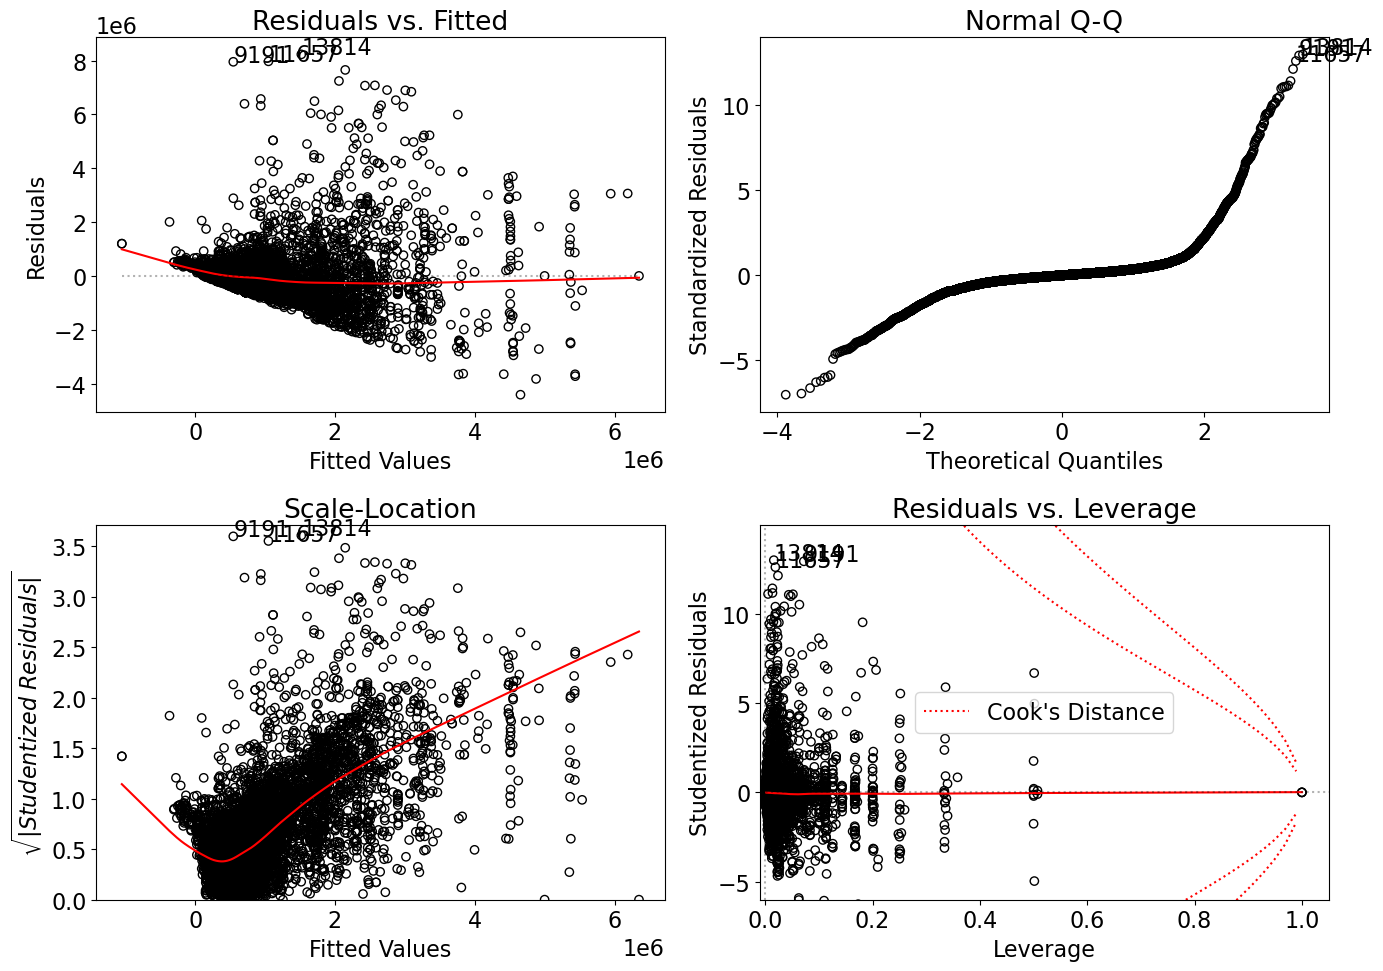

In [284]:
#Get residual plots
residual_plots(model_1)

In [285]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [287]:
print("MAPE for linear regression is : ",mean_absolute_percentage_error(y_test, model_1.predict(X_test)))

MAPE for linear regression is :  50.52986905410487


In [380]:
#Cannot apply linear regression as the data breaks all four assumptions of linear regression
# 1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

# 2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

# 3. Homoscedasticity: The residuals have constant variance at every level of x.

# 4. Normality: The residuals of the model are normally distributed.

## Applying KNN Regression

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Standardization for Numerical Variables
num_vars = [col for col in X_train.columns if X_train[col].dtype != 'O']

scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

print(y_train.shape, X_train.shape)

/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(13448,) (13448, 265)


In [363]:
#Checking KNN performance for K values ranging between 1 and 20
from sklearn import neighbors 
from math import sqrt
mape_val = [] #to store rmse values for different k
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)

for K in range(1,21):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_absolute_percentage_error(y_test,pred) #calculate MAPE
    mape_val.append(error) #store MAPE values
    print('MAPE value for k = ' , K , 'is:', error)

#From the results, we find that for K = 4 , we get the least Mean Absolute Percentage Error
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 4)

knn_model.fit(X_train, y_train)  #fit the model

/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  1 is: 37.47869834826224


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  2 is: 35.65580091782027


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  3 is: 34.28336584166633


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  4 is: 34.085959564338786


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  5 is: 34.61526359622567


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  6 is: 34.659069069967245


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  7 is: 35.13696447819068


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  8 is: 35.568849825107435


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  9 is: 35.84918341410094


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  10 is: 36.1046434746252


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  11 is: 36.34594997628331


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  12 is: 36.8204444899917


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  13 is: 37.00998992231306


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  14 is: 37.34105951781617


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  15 is: 37.621041140486675


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  16 is: 37.99869632758936


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  17 is: 38.25538334112687


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  18 is: 38.60128605219874


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  19 is: 38.752485216901974


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MAPE value for k =  20 is: 38.98584307611324


/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsRegressor(n_neighbors=4)

# Reading Test Data

In [366]:
df_test = pd.read_excel('Test-1665386517573.xlsx')
df_test.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07


### Applying same steps as on train data

In [324]:
df_test.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,3.385559,10837.683924,5170.971730,279.483651,1.656335,0.136921,1.793256,11015.183924,4060.355586,1975.443460,1.309605
std,1.364623,526.594771,3581.310989,562.104975,4.456347,1.211945,4.733782,37702.788446,14807.827309,23.707392,0.739623
min,1.000000,10001.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,80.000000,1941.000000,1.000000
25%,2.000000,10310.000000,2373.000000,25.000000,1.000000,0.000000,1.000000,2100.000000,1222.000000,1955.000000,1.000000
50%,3.000000,11105.000000,4772.500000,54.000000,1.000000,0.000000,1.000000,3126.500000,1720.000000,1971.000000,1.000000
75%,5.000000,11361.250000,7106.000000,146.000000,2.000000,0.000000,2.000000,5000.000000,2440.250000,2000.000000,1.000000
max,5.000000,11694.000000,16262.000000,5026.000000,128.000000,50.000000,130.000000,484555.000000,231891.000000,2012.000000,4.000000


In [325]:
df_test.shape

(2936, 18)

In [326]:
df_test.isnull().sum()

PropertyID                    0
Borough                       0
State                         0
Surroundings                  0
Address                       0
ZipCode                       0
Block                         0
Lot                           0
BldgClassCategory             0
NoOfResidentialUnits          0
NoOfCommercialUnits           0
TotalNoOfUnits                0
LandAreaInSqFt                0
GrossAreaInSqFt               0
YearOfConstruction            0
TaxClass_AtEvaluationTime     0
BldgClass_AtEvaluationTime    0
DateOfEvaluation              0
dtype: int64

In [327]:
drop_cols = ['PropertyID', 'State', 'Address', 'TotalNoOfUnits', 'BldgClassCategory']
df_test.drop(columns=drop_cols, axis=1, inplace=True)
df_test.columns

Index(['Borough', 'Surroundings', 'ZipCode', 'Block', 'Lot',
       'NoOfResidentialUnits', 'NoOfCommercialUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'DateOfEvaluation'],
      dtype='object')

In [328]:
df_test['YearOfEvaluation'] = df_test.DateOfEvaluation.dt.year
df_test.drop(columns=['DateOfEvaluation'], axis=1, inplace=True)
df_test.columns

Index(['Borough', 'Surroundings', 'ZipCode', 'Block', 'Lot',
       'NoOfResidentialUnits', 'NoOfCommercialUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'YearOfEvaluation'],
      dtype='object')

In [329]:
df_test['Borough'] = df_test['Borough'].astype('category')
df_test['TaxClass_AtEvaluationTime'] = df_test['TaxClass_AtEvaluationTime'].astype('category')
df_test.dtypes

Borough                       category
Surroundings                    object
ZipCode                          int64
Block                            int64
Lot                              int64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
LandAreaInSqFt                   int64
GrossAreaInSqFt                  int64
YearOfConstruction               int64
TaxClass_AtEvaluationTime     category
BldgClass_AtEvaluationTime      object
YearOfEvaluation                 int64
dtype: object

In [330]:
bldg_class = lambda categoryName: categoryName[0]
df_test['BldgClass_AtEvaluationTime'] = df_test['BldgClass_AtEvaluationTime'].apply(bldg_class)
df_test['BldgClass_AtEvaluationTime']

0       B
1       B
2       S
3       E
4       C
       ..
2931    R
2932    R
2933    R
2934    R
2935    R
Name: BldgClass_AtEvaluationTime, Length: 2936, dtype: object

In [331]:
vals = ['A', 'B', 'R', 'C']
df_test['BldgClass_AtEvaluationTime'] = df_test.BldgClass_AtEvaluationTime.where(df_test.BldgClass_AtEvaluationTime.isin(vals), 'Other')
df_test.BldgClass_AtEvaluationTime.value_counts()

A        1249
B         826
R         467
C         209
Other     185
Name: BldgClass_AtEvaluationTime, dtype: int64

In [332]:
cat_attr=df_test.select_dtypes(include ='object').columns
df_test[cat_attr] = df_test[cat_attr].astype('category')

In [333]:
df_test.dtypes

Borough                       category
Surroundings                  category
ZipCode                          int64
Block                            int64
Lot                              int64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
LandAreaInSqFt                   int64
GrossAreaInSqFt                  int64
YearOfConstruction               int64
TaxClass_AtEvaluationTime     category
BldgClass_AtEvaluationTime    category
YearOfEvaluation                 int64
dtype: object

In [353]:
cat_attr=df_test.select_dtypes(include ='category').columns
cat_attr

Index(['Borough', 'Surroundings', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime'],
      dtype='object')

In [354]:
df_test.Surroundings.value_counts()

FLUSHING-NORTH       119
GREAT KILLS          119
ELTINGVILLE           73
BAYSIDE               70
CANARSIE              62
                    ... 
STAPLETON-CLIFTON      1
INWOOD                 1
HARLEM-UPPER           1
TOMPKINSVILLE          1
FORT GREENE            1
Name: Surroundings, Length: 223, dtype: int64

In [355]:
# One hot encoding on test data
enc_data=pd.DataFrame(enc.transform(df_test[cat_attr]).toarray())

df_test_categorised_data =df_test.join(enc_data)
df_test_categorised_data.drop(columns=cat_attr, axis=1, inplace=True)

In [356]:
df_test_categorised_data.columns

Index([             'ZipCode',                'Block',                  'Lot',
       'NoOfResidentialUnits',  'NoOfCommercialUnits',       'LandAreaInSqFt',
            'GrossAreaInSqFt',   'YearOfConstruction',     'YearOfEvaluation',
                            0,
       ...
                          246,                    247,                    248,
                          249,                    250,                    251,
                          252,                    253,                    254,
                          255],
      dtype='object', length=265)

In [357]:
#Applying Standard Scaler on the test data
num_vars = [col for col in df_test_categorised_data.columns if df_test_categorised_data[col].dtype != 'O']
df_test_categorised_data[num_vars] = scaler.transform(df_test_categorised_data[num_vars])

/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [364]:
#Running the KNN model on the test data
pred=knn_model.predict(df_test_categorised_data) #make prediction on test set

/Users/sai-8996/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[]


In [365]:
pred

array([ 451250. ,  451250. , 1542366.5, ..., 6769890.5, 3972625. ,
       1704544.5])

In [367]:
#Writing to output 
output_df = pd.DataFrame(df_test['PropertyID'])
output_df['PropertyEvaluationvalue'] = pred

output_df.to_csv('SaiDheeraj_Yanduru_131_MiTH.csv', index=None)